In [422]:
!pip install gdown

In [423]:
!gdown --id 16uFzwzOA31PoWhTSNNe6XdQzprhPIk4h

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16uFzwzOA31PoWhTSNNe6XdQzprhPIk4h
To: /kaggle/working/4K_House_Rent_Dataset.csv
100%|█████████████████████████████████████████| 567k/567k [00:00<00:00, 131MB/s]


In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load data

In [425]:
file_path = "/kaggle/working/4K_House_Rent_Dataset.csv"
df = pd.read_csv(file_path)

### Display the first few rows of the dataset

In [426]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


### Summary statistics

In [427]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


### Assuming 'Size' is the independent variable and 'Rent' is the dependent variable

In [428]:
X = df['Size'].values
y = df['Rent'].values

### Normalize features

In [429]:
X = (X - np.mean(X)) / np.std(X)

### Add a column of ones to X for the intercept term

In [430]:
X = np.column_stack((np.ones(len(X)), X))

### Initialize parameters

In [431]:
theta = np.zeros(2)
alpha = 0.01
iterations = 1000

### Gradient Descent

In [432]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = []
    for _ in range(iterations):
        predictions = np.dot(X, theta)
        errors = predictions - y
        cost = np.sum(errors ** 2) / (2 * len(y))
        cost_history.append(cost)

        gradient = np.dot(X.T, errors) / len(y)
        theta -= alpha * gradient
    return theta, cost_history

### Run Gradient Descent

In [433]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

### Plot the data and the regression line

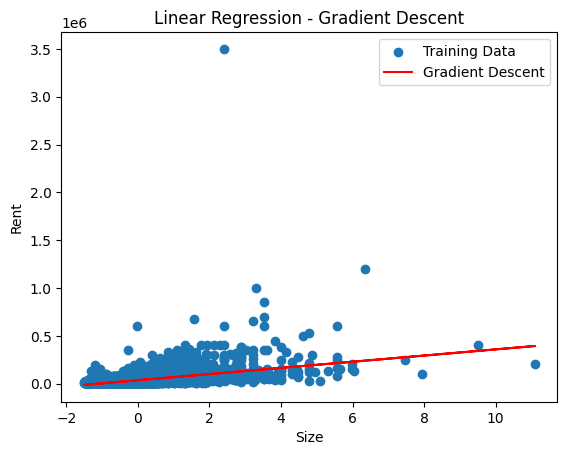

In [434]:
plt.scatter(X[:, 1], y, label='Training Data')
plt.plot(X[:, 1], np.dot(X, theta), color='red', label='Gradient Descent')
plt.xlabel('Size')
plt.ylabel('Rent')
plt.title('Linear Regression - Gradient Descent')
plt.legend()
plt.show()

### Plot the cost over iterations

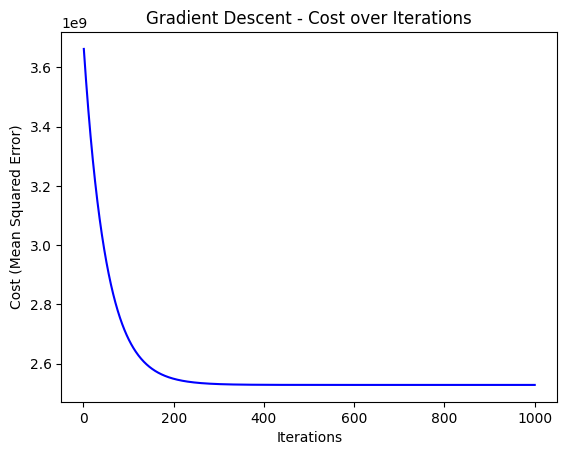

In [435]:
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (Mean Squared Error)')
plt.title('Gradient Descent - Cost over Iterations')
plt.show()